In [1]:
from preamble import *
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['legend.numpoints'] = 1

## Evaluation Metrics and scoring

### Metrics for binary classification

In [2]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("data/bank-campaign.csv")
X = data.drop("target", axis=1).values
y = data.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [3]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("predicted labels: %s" % np.unique(pred_most_frequent))
print("score: %f" % dummy_majority.score(X_test, y_test))

predicted labels: ['no']
score: 0.887540


In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
tree.score(X_test, y_test)

0.90278721957851804

In [8]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: %f" % dummy.score(X_test, y_test))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: %f" % logreg.score(X_test, y_test))

dummy score: 0.803729
logreg score: 0.912013


#### Confusion matrices

In [9]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[8911  228]
 [ 678  480]]


<IPython.core.display.Javascript object>


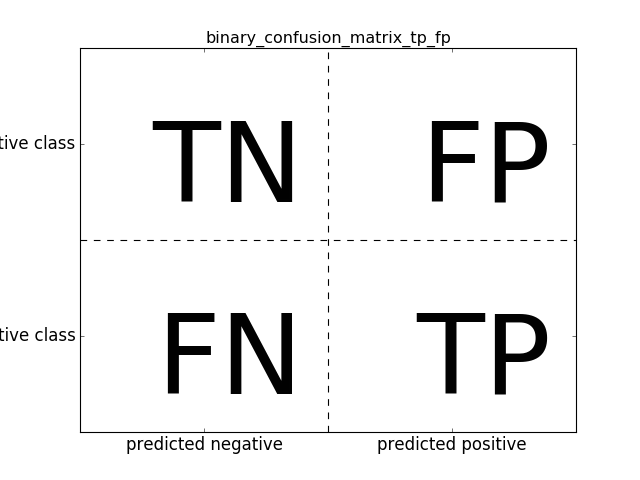

In [10]:
mglearn.plots.plot_binary_confusion_matrix()

In [14]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[9139    0]
 [1158    0]]

Dummy model:
[[8111 1028]
 [1024  134]]

Decision tree:
[[8809  330]
 [ 671  487]]

Logistic Regression
[[8911  228]
 [ 678  480]]


##### Relation to accuracy
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

#### Precision, recall and f-score
\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
\begin{equation}
\text{F} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

In [15]:
from sklearn.metrics import f1_score
print("f1 score most frequent: %.2f" % f1_score(y_test, pred_most_frequent, pos_label="yes"))
print("f1 score dummy: %.2f" % f1_score(y_test, pred_dummy, pos_label="yes"))
print("f1 score tree: %.2f" % f1_score(y_test, pred_tree, pos_label="yes"))
print("f1 score: %.2f" % f1_score(y_test, pred_logreg, pos_label="yes"))

f1 score most frequent: 0.00
f1 score dummy: 0.12
f1 score tree: 0.49
f1 score: 0.51


/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1117: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["no", "yes"]))

             precision    recall  f1-score   support

         no       0.89      1.00      0.94      9139
        yes       0.00      0.00      0.00      1158

avg / total       0.79      0.89      0.83     10297



/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1117: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
print(classification_report(y_test, pred_tree,
                            target_names=["no", "yes"]))

             precision    recall  f1-score   support

         no       0.93      0.96      0.95      9139
        yes       0.60      0.42      0.49      1158

avg / total       0.89      0.90      0.90     10297



In [18]:
print(classification_report(y_test, pred_logreg,
                            target_names=["no", "yes"]))

             precision    recall  f1-score   support

         no       0.93      0.98      0.95      9139
        yes       0.68      0.41      0.51      1158

avg / total       0.90      0.91      0.90     10297



# Taking uncertainty into account

In [19]:
from mglearn.datasets import make_blobs 
from sklearn.svm import SVC
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],        
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)                                     


<IPython.core.display.Javascript object>


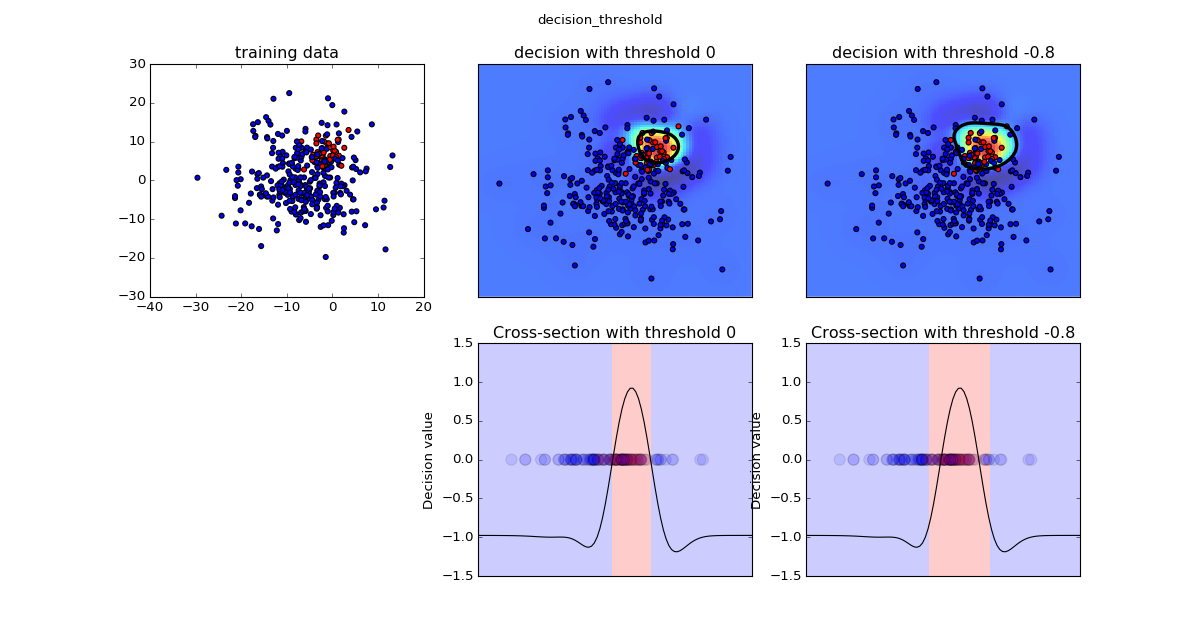

In [13]:
mglearn.plots.plot_decision_threshold()

In [20]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [20]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [21]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



## Precision-Recall curves and ROC curves

In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,
                                                       svc.decision_function(X_test))

<IPython.core.display.Javascript object>


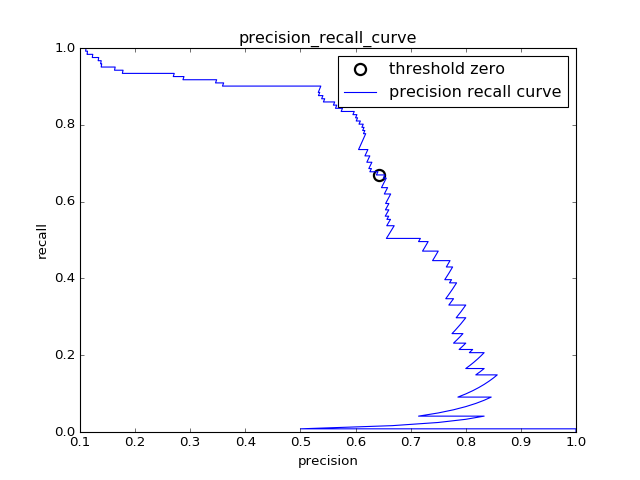

In [23]:
# create a similar dataset as before, but with more samples to get a smoother curve
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.figure()
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.title("precision_recall_curve");
plt.legend(loc="best")

<IPython.core.display.Javascript object>


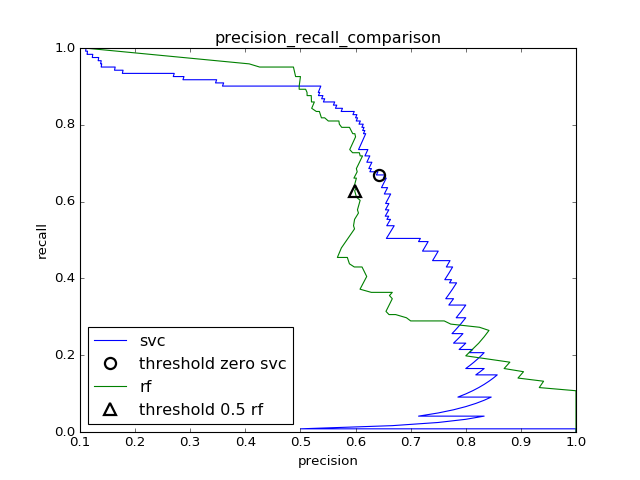

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])
plt.figure()

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10,
         label="threshold 0.5 rf", fillstyle="none", c='k', mew=2)
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")
plt.title("precision_recall_comparison");

In [20]:
print("f1_score of random forest: %f" % f1_score(y_test, rf.predict(X_test)))
print("f1_score of svc: %f" % f1_score(y_test, svc.predict(X_test)))

f1_score of random forest: 0.609756
f1_score of svc: 0.655870


In [21]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("average precision of random forest: %f" % ap_rf)
print("average precision of svc: %f" % ap_svc)

average precision of random forest: 0.665737
average precision of svc: 0.662636


#### Receiver Operating Characteristics (ROC) and AUC
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

<IPython.core.display.Javascript object>


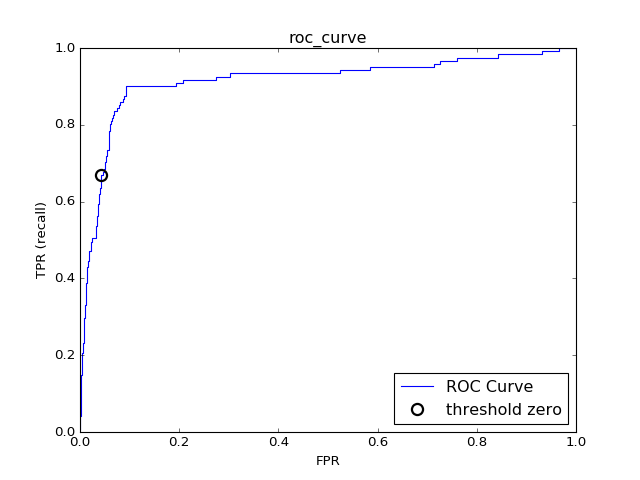

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.figure()

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title("roc_curve");
# find threshold closest to zero:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

<IPython.core.display.Javascript object>


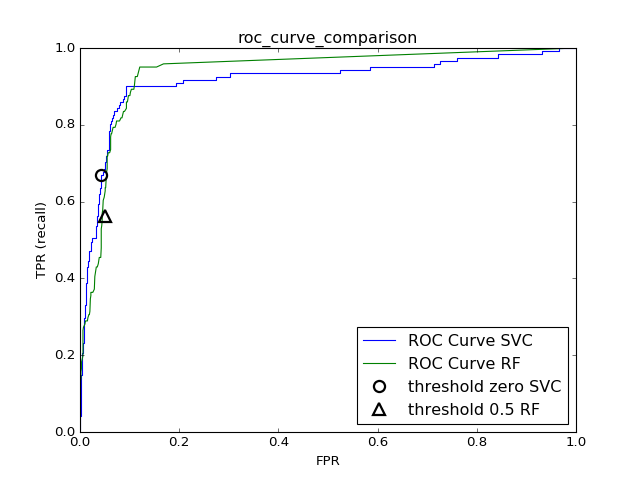

In [28]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title("roc_curve_comparison");
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [29]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: %f" % rf_auc)
print("AUC for SVC: %f" % svc_auc)

AUC for Random Forest: 0.936695
AUC for SVC: 0.916294


In [27]:
X = data.drop("target", axis=1).values
y = data.target.values
X.shape

(41188, 63)

<IPython.core.display.Javascript object>


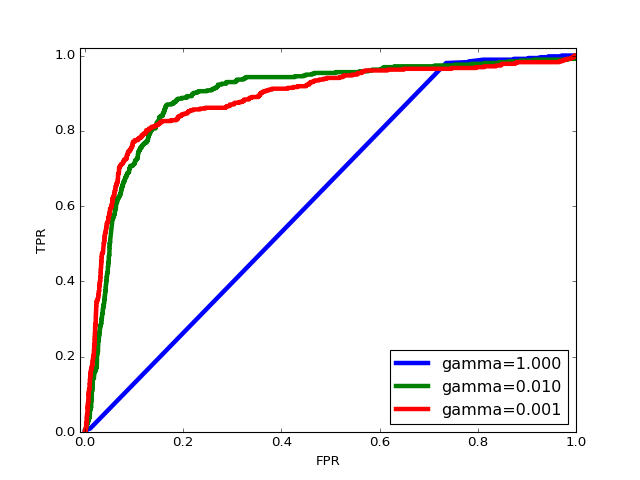

gamma = 1.000  accuracy = 0.89  AUC = 0.62
gamma = 0.010  accuracy = 0.89  AUC = 0.89
gamma = 0.001  accuracy = 0.91  AUC = 0.88


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, train_size=.1, test_size=.1)

plt.figure()

for gamma in [1, 0.01, 0.001]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test == "yes", svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test), pos_label="yes")
    print("gamma = %.03f  accuracy = %.02f  AUC = %.02f" % (gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma=%.03f" % gamma, linewidth=4)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

### Multi-class classification

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
print("confusion matrix:")
print(confusion_matrix(y_test, pred))

accuracy: 0.953
confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


<IPython.core.display.Javascript object>


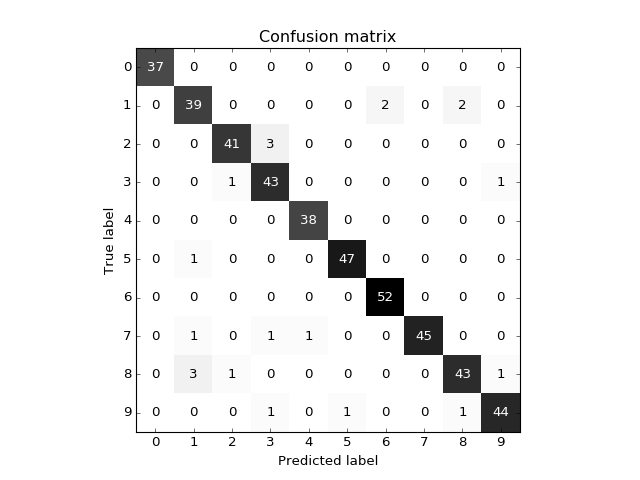

In [31]:
plt.figure()
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='Predicted label', ylabel='True label',
                                     xticklabels=digits.target_names, yticklabels=digits.target_names,
                                     cmap=plt.cm.gray_r, fmt="%d")    

plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [32]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [33]:
print("micro average f1 score: %f" % f1_score(y_test, pred, average="micro"))
print("macro average f1 score: %f" % f1_score(y_test, pred, average="macro"))

micro average f1 score: 0.953333
macro average f1 score: 0.954000


## Using evaluation metrics in model selection

In [43]:
from sklearn.cross_validation import cross_val_score
# default scoring for classification is accuracy
print("default scoring ", cross_val_score(SVC(), X, y))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("explicit accuracy scoring ", explicit_accuracy)
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("AUC scoring ", roc_auc)

default scoring  [ 0.9  0.9  0.9]
explicit accuracy scoring  [ 0.9  0.9  0.9]
AUC scoring  [ 0.994  0.99   0.996]


In [45]:
from sklearn.model_selection import GridSearchCV

# back to the bank campaign
X = data.drop("target", axis=1).values
y = data.target.values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=.1, test_size=.1, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)):", grid.best_score_)
print("Test set AUC: %.3f" % roc_auc_score(y_test, grid.decision_function(X_test)))
print("Test set accuracy %.3f: " % grid.score(X_test, y_test))

# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC):", grid.best_score_)
print("Test set AUC: %.3f" % roc_auc_score(y_test, grid.decision_function(X_test)))
print("Test set accuracy %.3f: " % grid.score(X_test, y_test))


Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970304380104
Test set AUC: 0.992
Test set accuracy 0.973: 

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997467845028
Test set AUC: 1.000
Test set accuracy 1.000: 


/home/andy/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:418: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


In [47]:
from sklearn.metrics.scorer import SCORERS
    print(sorted(SCORERS.keys()))

['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']


In [ ]:
def my_scoring(fitted_estimator, X_test, y_test):
    return (fitted_estimator.predict(X_test) == y_test).mean()

GridSearchCV(SVC(), param_grid, scoring=my_scoring)

# Exercises
Load the adult dataset from ``data/adult.csv``, and split it into training and test set.
Apply grid-search to the training set, searching for the best C for Logistic Regression, also search over L1 penalty vs L2 penalty.
Plot the ROC curve of the best model on the test set.

In [ ]:
# get dummy variables, needed for scikit-learn models on categorical data:
X = pd.get_dummies(data.drop("income", axis=1))
y = data.income == " >50K"